# Laboratorio 04: Interpolación.

---
### Profesor: Daniel Ruiz Mejía
### Nombre: José Nicolas Rodriguez Montoya
*Métodos computacionales 2025-I*

---

# 1.

Un automóvil que viaja a lo largo de una carretera recta es cronometrado en varios puntos. Los datos de las observaciones se dan en la siguiente tabla, donde el tiempo está en segundos, la distancia en metros y la velocidad en metros por segundo.

```
tiempos = np.array([0, 3, 5, 8, 13]) # segundos
distancias = np.array([0, 225, 383, 623, 993]) # metros
velocidades = np.array([75, 77, 80, 74, 72]) # metros/segundo
```

- Usar un polinomio de Hermite y de Splines Cúbicos para predecir la posición del automóvil y su velocidad cuando $t=10$ s.
- ¿Cuál es la velocidad máxima predicha para el automóvil en cada caso?

In [ ]:
import numpy as np
from scipy.interpolate import CubicSpline, CubicHermiteSpline
import matplotlib.pyplot as plt
import sympy as sp

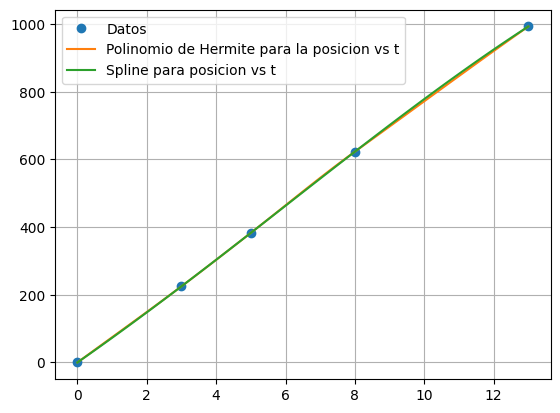

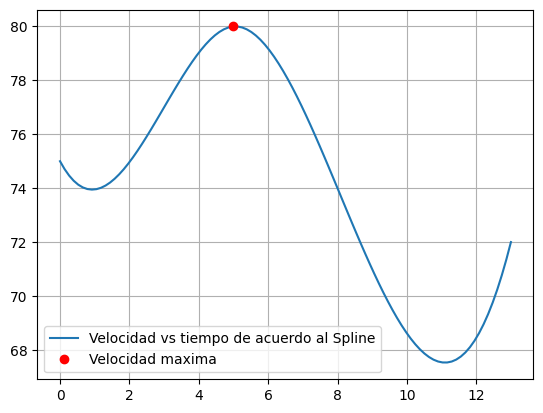

La poscion del coche a los 10s es 771.96, su velocidad de acuerdo al Spline es 68.61510791366906, y su velocidad maxima es 79.99880391414267)


In [ ]:
tiempos = np.array([0, 3, 5, 8, 13]) # segundos
distancias = np.array([0, 225, 383, 623, 993]) # metros
velocidades = np.array([75, 77, 80, 74, 72]) # metros/segundo

Hermite = CubicHermiteSpline(tiempos, distancias, velocidades)



Spline = CubicSpline(tiempos, distancias) #Encontramos el polinomio de Hermite
Spline_vel = CubicSpline(tiempos, velocidades) #Encontramos el polinomio del metodo de splines

x_interp = np.linspace(0, 13, 100) #Creamos un conjunto a interpolar

plt.plot(tiempos, distancias, 'o', label='Datos')
plt.plot(x_interp, Hermite(x_interp), label='Polinomio de Hermite para la posicion vs t')
plt.plot(x_interp, Spline(x_interp), label='Spline para posicion vs t ')
plt.legend()
plt.grid()
plt.show()
plt.plot(x_interp, Spline_vel(x_interp), label = 'Velocidad vs tiempo de acuerdo al Spline')
plt.plot(5, Spline_vel(5), 'ro', label = 'Velocidad maxima ')
plt.legend()
plt.grid()
plt.show()
print(f'La poscion del coche a los 10s es {Hermite(10)}, su velocidad de acuerdo al Spline es {Spline_vel(10)}, y su velocidad maxima es {np.max(Spline_vel(x_interp))})')

# 2.
Los valores de la aceleración gravitacional $g$ dependen de la altitud $y$ según se muestra en la tabla. Utilice el método de diferencias divididas de Newton para estimar el valor de la aceleración gravitacional a las altitudes de 5,000 m, 42,000 m y 90,000 m. Grafique la distribución de la función de interpolación obtenida junto con los datos dados.

```
y = [0, 20000, 40000, 60000, 80000]  # en metros
g = [9.8100, 9.7487, 9.6879, 9.6278, 9.5682]  # en m/s²
```

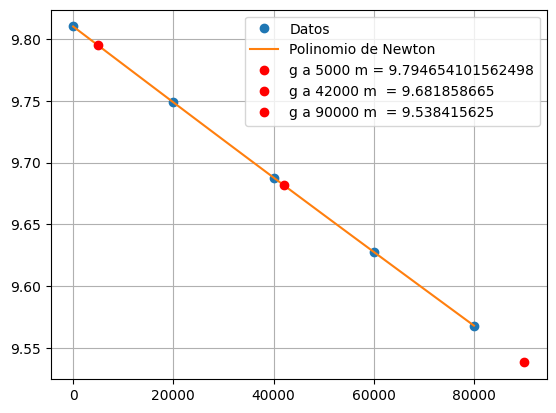

In [ ]:

def diferencia_dividida(x, y, i, j):
    '''
    Calcula recursivamente la diferencia dividida f[x_i, x_{i+1}, ..., x_j]
    Entradas:
      x: array de puntos x
      y: array de puntos y
      i: indice del primer punto
      j: indice del ultimo punto
    Salidas:
      a: coeficiente diferencia dividida (i,j)
    '''
    if i == j:
        return y[i]
    else:
        num = diferencia_dividida(x, y, i + 1, j) - diferencia_dividida(x, y, i, j - 1)
        den = x[j] - x[i]
        return num / den

def coeficientes_a(x, y):
    '''
    Calcula los coeficientes a_i del polinomio de Newton.
    Entradas:
      x: array de puntos x
      y: array de puntos y
    Salidas:
      coeficientes: array de coeficientes a_i
    '''
    n = len(x)
    coeficientes = np.zeros_like(x, dtype=float)
    for i in range(n):
        coeficientes[i] = diferencia_dividida(x, y, 0, i)
    return coeficientes

def Polinomio_Newton(x, y):
  '''
  Calcula el polinomio de Newton a partir de los puntos (x, y)
  Entradas:
    x: array de puntos x
    y: array de puntos y
  Salidas:
    P: polinomio de Newton como una función de x
  '''
  coef = coeficientes_a(x, y)
  def P(x_val):
    resultado = coef[0]
    producto = 1
    for i in range(1, len(x)):
      producto *= (x_val - x[i - 1])
      resultado += coef[i] * producto
    return resultado
  return P


y = [0, 20000, 40000, 60000, 80000]  # en metros
g = [9.8100, 9.7487, 9.6879, 9.6278, 9.5682]  # en m/s²

Poly_N = Polinomio_Newton(y, g) #Calculamos el polinomio de Newton asociado a los datos provistos

x_interp = np.linspace(0, 80000, 100)

plt.plot(y, g, 'o', label='Datos')
plt.plot(x_interp, Poly_N(x_interp), label='Polinomio de Newton')
plt.plot(5000, Poly_N(5000), 'ro', label= f'g a 5000 m = {Poly_N(5000)}')
plt.plot(42000, Poly_N(42000), 'ro', label= f'g a 42000 m  = {Poly_N(42000)}')
plt.plot(90000, Poly_N(90000), 'ro', label= f'g a 90000 m  = {Poly_N(90000)}')
plt.legend()
plt.grid()
plt.show()

# Con el polinomio obtenido veamos que resultado de la gravedad nos da para una altura de 90.000




# 3.
La densidad del aire $\rho$ depende de la temperatura $T$ como se muestra en la tabla. Utilice el método de diferencias divididas de Newton para estimar los valores de la densidad del aire a 250 K, 800 K y 3,000 K. Luego, determine la densidad del aire a temperaturas desde 100 K hasta 2,500 K en intervalos de 10 K. Grafique la distribución de la densidad del aire calculada en función de la temperatura.

```
T = np.array([100, 200, 300, 500, 700, 1000, 1500, 2000, 2500]) # en K
rho = np.array([3.6010, 1.7684, 1.1774, 0.7048, 0.5030, 0.3524, 0.2355, 0.1762, 0.1394]) # en kg/m^3
```



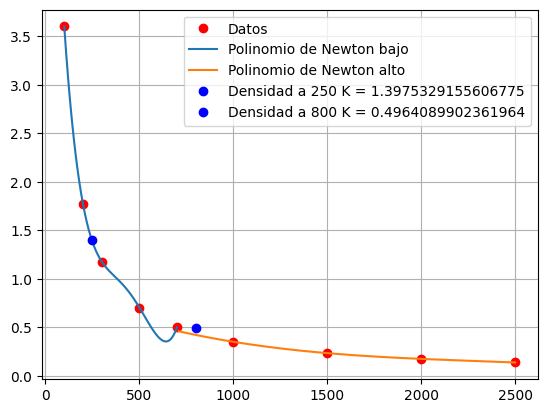

[100. 200. 300. 500.] [3.601  1.7684 1.1774 0.7048]
[ 700. 1000. 1500. 2000.] [0.503  0.3524 0.2355 0.1762]


In [ ]:
#Con la funcion definida anteriormente.
T = np.array([100.0, 200.0, 300.0, 500.0, 700.0, 1000.0, 1500.0, 2000.0, 2500.0]) # en K
rho = np.array([3.6010, 1.7684, 1.1774, 0.7048, 0.5030, 0.3524, 0.2355, 0.1762, 0.1394]) # en kg/m^3

#Para evitar algun posible fenomeno de oscilacion, partiremos en dos partes
# Dividimos en dos polinomios de grado menor
poly_bajo = Polinomio_Newton(T[:5], rho[:5])  # 100-700 K
poly_medio = Polinomio_Newton(T[5:9], rho[5:9])  # 700-2500 K



#Partes de interpolacion
Ts = np.arange(100, 2510, 10)

Ts_bajo = Ts[Ts < 701]
Ts_alto = Ts[Ts > 700]

poly_ne = Polinomio_Newton(T, rho)



plt.plot(T, rho, 'ro', label = 'Datos')
plt.plot(Ts_bajo, poly_bajo(Ts_bajo), label = 'Polinomio de Newton bajo')
plt.plot(Ts_alto, poly_medio(Ts_alto), label = 'Polinomio de Newton alto')
plt.plot(250, poly_ne(250), 'bo', label= f'Densidad a 250 K = {poly_ne(250)}')
plt.plot(800, poly_ne(800), 'bo', label= f'Densidad a 800 K = {poly_ne(800)}')

plt.legend()
plt.grid()
plt.show()



print(T[:4], rho[:4])
print(T[4:8], rho[4:8])

Estimaciones de densidad:
A 250 K: 1.3975 kg/m³
A 800 K: 0.4964 kg/m³
A 3000 K: 1561.1659 kg/m³
3000 K está fuera del rango de datos (100-2500 K)


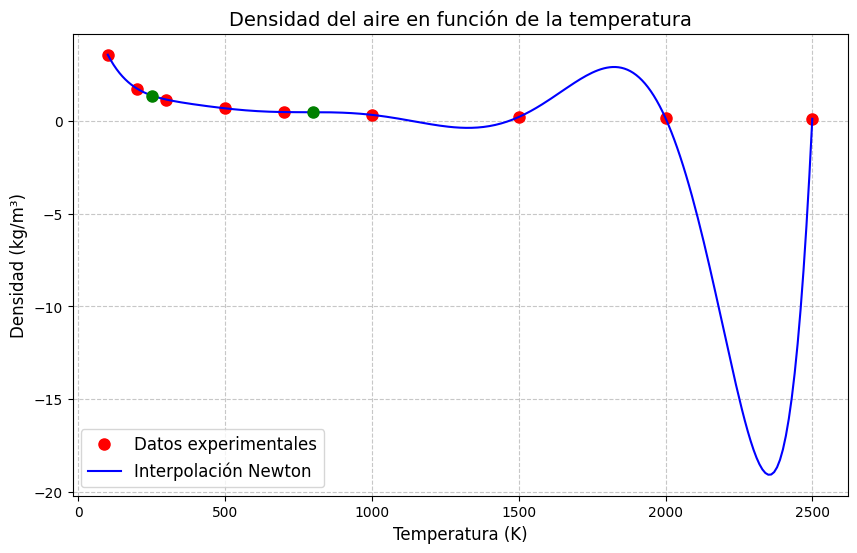

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Datos proporcionados
T = np.array([100.0, 200.0, 300.0, 500.0, 700.0, 1000.0, 1500.0, 2000.0, 2500.0])  # Temperatura en K
rho = np.array([3.6010, 1.7684, 1.1774, 0.7048, 0.5030, 0.3524, 0.2355, 0.1762, 0.1394])  # Densidad en kg/m³


#poly_ne = poly_ne(T, rho)

# 1. Estimación en puntos específicos
puntos_estimacion = [250, 800, 3000]
print("Estimaciones de densidad:")
for temp in puntos_estimacion:
    densidad = poly_ne(temp)
    print(f"A {temp} K: {densidad:.4f} kg/m³")
    # Advertencia para extrapolación
    if temp < T.min() or temp > T.max():
        print(f"{temp} K está fuera del rango de datos (100-2500 K)")

# 2. Cálculo en intervalo 100-2500 K cada 10 K
Ts = np.arange(100, 2510, 10)  # Temperaturas desde 100 hasta 2500 K en pasos de 10 K
rhos = poly_ne(Ts)  # Densidades calculadas

# 3. Gráfico
plt.figure(figsize=(10, 6))
plt.plot(T, rho, 'ro', markersize=8, label='Datos experimentales')
plt.plot(Ts, rhos, 'b-', label='Interpolación Newton')
plt.xlabel('Temperatura (K)', fontsize=12)
plt.ylabel('Densidad (kg/m³)', fontsize=12)
plt.title('Densidad del aire en función de la temperatura', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)

# Destacar los puntos estimados
for temp in puntos_estimacion:
    if temp >= 100 and temp <= 2500:  # Solo si está dentro del rango
        plt.plot(temp, poly_ne(temp), 'go', markersize=8,
                label=f'Estimado a {temp} K' if temp == puntos_estimacion[0] else "")

plt.show()

# 4.
Uno de los dispositivos más precisos para medir temperatura es el termómetro de resistencia de platino, también conocido como RTD. En este dispositivo, un alambre delgado y largo de platino se enrolla alrededor de un carrete y se encapsula en una cubierta de acero inoxidable. La resistencia del alambre cambia de manera muy lineal con la temperatura. Una longitud típica de alambre tiene una resistencia de aproximadamente 100 $\Omega$ a $0^{\circ}$ C y cambia alrededor de 0.39 $\Omega/^{\circ}$ C. Por lo tanto, para medir temperaturas con precisión, es necesario poder medir cambios en la resistencia con alta resolución. Tradicionalmente, se ha utilizado el circuito de puente desequilibrado para esto, como se ilustra en la figura, el cual proporciona un voltaje de salida pequeño que es proporcional (aunque no linealmente) a la resistencia del sensor.

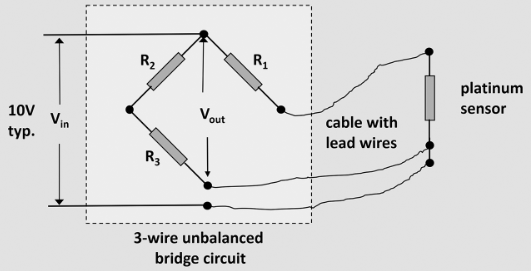




A continuación se presentan mediciones tomadas de dicho circuito, con $R_1 = R_2 = 5$ $k\Omega$ y $R_3 = 120$ $\Omega$:

```
resistencia = np.array([100, 115, 130, 145, 160, 175])  # Resistencia del sensor (Ohms)
voltaje = np.array([0.45244, 0.10592, -0.19918, -0.46988, -0.71167, -0.92896])  # Salida del puente (V)
```

Un termómetro de resistencia de platino estándar de 100 $\Omega$ tiene una resistencia de 139.27 $\Omega$ a $100^\circ$ C. Utilice el método de interpolación que desee para estimar el voltaje de salida del puente en estas condiciones. Si la salida del puente se mide en 0 voltios, estime la resistencia medida. ¿Qué conclusión puede obtener?

1. Voltaje cuando R = 139.27 : -0.37015349227048006 V
2. Resistencia cuando V = 0 V: 119.99914551777371 


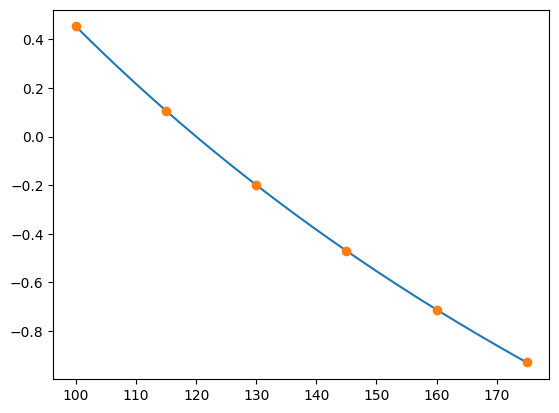

In [ ]:
resistencia = np.array([100, 115, 130, 145, 160, 175])  # Resistencia del sensor (Ohms)
voltaje = np.array([0.45244, 0.10592, -0.19918, -0.46988, -0.71167, -0.92896])  # Salida del puente (V)
from scipy.interpolate import interp1d
# 1. Interpolación para estimar el voltaje cuando R = 139.27 Ω
# Usaremos interpolación cúbica para mayor precisión
interp_R_to_V = interp1d(resistencia, voltaje, kind='cubic')
voltaje_139 = interp_R_to_V(139.27)

# 2. Encontrar la resistencia cuando V = 0 V
# Necesitamos una función inversa (voltaje a resistencia)
interp_V_to_R = interp1d(voltaje, resistencia, kind='cubic')
resistencia_0V = interp_V_to_R(0)

x_interop = np.linspace(resistencia.min(), resistencia.max(), 1000)

plt.plot(x_interop, interp_R_to_V(x_interop), label ='Interpolacion')
plt.plot(resistencia, voltaje, 'o', label = 'Datos')

print(f"1. Voltaje cuando R = 139.27 : {voltaje_139} V")
print(f"2. Resistencia cuando V = 0 V: {resistencia_0V} ")

# 5.
El índice de refracción del vidrio de borosilicato a diferentes longitudes de onda se presenta en la siguiente tabla. Estime la longitud de onda donde el índice de refracción es 1.520.

```
lambda_angstrom = np.array([6563, 6439, 5890, 5338, 5086, 4861, 4340, 3988])  # en Å
indice_refraccion = np.array([1.50883, 1.50917, 1.51124, 1.51386, 1.51534, 1.51690, 1.52136, 1.52546])
```

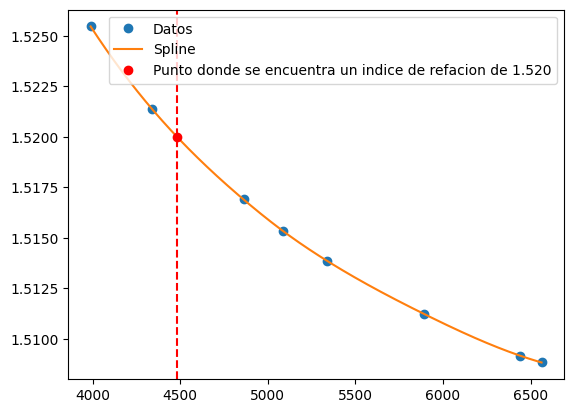

In [ ]:
from scipy.optimize import root_scalar
lambda_angstrom = np.array([6563, 6439, 5890, 5338, 5086, 4861, 4340, 3988])  # en Å
indice_refraccion = np.array([1.50883, 1.50917, 1.51124, 1.51386, 1.51534, 1.51690, 1.52136, 1.52546])


#Organizamos los datos de forma que queden de mayor a menor

lambda_angstrom.sort()
indices = indice_refraccion[::-1]

#Encontramos un polinomio de interpolacion usando los splines
spl = CubicSpline(lambda_angstrom, indices)

#definimos una funcion que nos permitira encontrar un lambda para el cual el indice de refraccion sea 1.520

f = lambda x: spl(x) - 1.520

#Escogemos 4000 como punto de partida debido a la cercania de los datos con el valor deseado, veamos el comportamiento
sol = root_scalar(f,x0=4000).root


#Graficamos para ver si es congruente
x_interp = np.linspace(lambda_angstrom.min(), lambda_angstrom.max(), 1000)
plt.plot(lambda_angstrom, indices, 'o', label='Datos')
plt.plot(x_interp, spl(x_interp), label='Spline')
plt.plot(sol, spl(sol),'ro', label = 'Punto donde se encuentra un indice de refacion de 1.520')
plt.axvline(x=sol, color='r', linestyle='--')
plt.legend()
plt.show()
